# Importing Data

## Automate Importing Many Files

globbing - File name Pattern Matching

Wildcard = Symbol that matches any arbitrary # of characters

'*' - mathces any string
? matches ONLY 1 character (0-9 or a-z)

eg:
*.csv = matches any file ending in .csv <br>
file_?.csv = matches --->>file_0.csv, file_3.csv,......etc.....

- sales*.csv ---> Mathces all files startinh with sales and ending with .csv

``` python
import glob
pattern = 'datasets/*.csv'
csv_file_names = glob.glob(pattern)
```

In [290]:
import glob
pattern = 'datasets/*.csv'
csv_files = glob.glob(pattern)
print(csv_files)

['datasets\\APPL.csv', 'datasets\\capital-onebike.csv', 'datasets\\digits.csv', 'datasets\\Election.csv', 'datasets\\Hospital Data.csv', 'datasets\\Meteor.csv', 'datasets\\temperature.csv', 'datasets\\titanic.csv', 'datasets\\winequality-red.csv']


In [ ]:
data_frames = [pd.read_csv(file) for file in csv_files]

## Text Files

### Working Directory Files

In [131]:
import os
wd = os.getcwd()
os.listdir(wd)

['.ipynb_checkpoints',
 'app.py',
 'Chinook.sqlite',
 'datasets',
 'Data_Science_NoteBook.ipynb',
 'Formatting.ipynb',
 'Importing Data.ipynb',
 'Pandas & Python.ipynb']

### Plain Text Files

- Plain Text Format

<div class="alert alert-block alert-danger">
<b>Manual Open/Close Method</b> 
</div>

In [16]:
filename = 'datasets/moby_dick.txt'

#Open a Connection to the file
file = open(filename, mode='r')   #r = read mode

text = file.read()         #save text contained in the file to a vraiable

file.close()               #Close conection

print(text[0:400])
print("************************************")
print("************************************")
print("************************************")
print(file.closed) #Check if file is closed

**The Project Gutenberg Etext of Moby Dick, by Herman Melville**
#3 in our series by Herman Melville

This Project Gutenberg version of Moby Dick is based on a combination
of the etext from the ERIS project at Virginia Tech and another from
Project Gutenberg's archives, as compared to a public-domain hard copy.

Copyright laws are changing all over the world, be sure to check
the copyright laws fo
************************************
************************************
************************************
True


In [21]:
# Read & print the first 3 lines
with open('datasets/moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

**The Project Gutenberg Etext of Moby Dick, by Herman Melville**

#3 in our series by Herman Melville





<div class="alert alert-block alert-danger">
<b>Using a Contet Manager to Auto-Close the file connection</b> 
</div>

In [ ]:
with open(filename, mode='r') as file:
    print(file.read())  #Do something

### Falt Files

<p style="border:1px; 
          border-style:solid; 
          border-color:#000000;
          padding: 1em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Text Files without structural relationships Containing Records (Row of fields/attributes)</b> 

</p>

#### Files Containing Constant DataTypes

<div class="alert alert-block alert-danger">
<b>Using Numpy</b> 
</div>

``` python
file = '....txt'
data = np.loadtxt(file,              #file path
                  delimiter='\t',    #defualt = space ,    (',' = CSV, '\t' = TSV )
                  skiprows=1,        #how many rows  you wish to skip
                  usecols=[0, 2],     #list of the indices of the columns we need.
                  dtype = str           # Set data type 
                 )
```

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
file = 'datasets/digits.csv'
digits = np.loadtxt(file, delimiter=',',dtype = float  )
print(type(digits))

<class 'numpy.ndarray'>


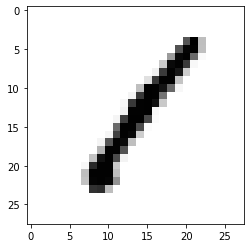

In [40]:
plt.imshow(digits[0,1:].reshape(28,28),cmap='Greys', interpolation='nearest')  #1st column= Target

#### Files Containing Mixed DataTypes

- Method - 1

``` python
data = np.genfromtxt('.....csv',
                     delimiter=',', 
                     names=True,           #header is present = True
                     dtype=None            #Automatically Figure out Dtypes
                    )
```
OUTPUT = <b> STRUCTURED ARRAY </b> 
``` python
data[5]            # get 5h row
data['column1']    # get 1st columns
```

- Method - 2

``` python
#Similar to np.genfromtext()
np.recfromcsv()        # default dtype is None

##Default Values
#delimiter=',' 
#names=True  
#dtype=None
```

#### Pandas

``` python
df = pd.read_csv(filepath,
                 sep='\t',             #Seperator
                 comment='#',       #remove characters that occur after '#' in the file
                 na_values=['ashwin']  # list of strings to be  recognized as NA/NaN
                 nrows=5,             #read first 5 rows
                 header=None)

```
- Convert to numpy <br><br>
df.values    

##  Special File Types

### Pickled File

- Picking = Serializing Data
- Converting Object to ByteStream



 'rb' = Read Only in BINARY

``` python
import pickle

with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

print(type(d))
```

### Excel

In [44]:
import pandas as pd

In [45]:
file = 'datasets/excel.xlsx'
xls = pd.ExcelFile(file)
print(xls.sheet_names)       # Print sheet names

['Sheet1', 'Sheet2', 'Sheet3']


- Importing sheets from Excel files::

``` python
df1 = xls.parse(0,               #Sheet Index / alternatively use sheet name
                skiprows=[0], 
                names=['col_1_new_name', 'col_2_new_name']
               )

```

In [48]:
df1 = xls.parse('Sheet2')
print(df1.head())

  names  age
0   asd   12
1  asdf   34
2  asdf   45


In [47]:
df2 = xls.parse(1)
print(df2.head())

  names  age
0   asd   12
1  asdf   34
2  asdf   45


### SAS/STATA

<center><b style="font-size:40px;color:black"> SAS  </b></center>

- SAS = Statistical Analysis System  (Buisness Intelligence, Multivariate Analysis, ..)


Common File Types : <br>
- .sas7bdat   #Dataset Files <br>
- .sas7bcat   #Catalog Files

``` python
# Import sas7bdat package
from sas7bdat import SAS7BDAT

with SAS7BDAT('xyz.sas7bdat') as file:
    df = file.to_data_frame()
```

<center><b style="font-size:40px;color:black"> STATA  </b></center>

- STATA = Statistics + Data        (Economics, Epidemiology)

``` python
df = pd.read_stata('xyz.dta')
```

### Matlab

``` python
import scipy.io
mat = scipy.io.loadmat('xyz.mat')
print(type(mat))  # = Dictionary

# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['key1']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['key1']))

```

- keys of Dictionary = Matlab Variamble Names
- Values = Data

### HDF-5    (Standard for storing large quantities of numerica data)

``` python
import pandas as pd
import tables
filename = 'datasets/nsfg.hdf5'
df = pd.read_hdf(filename)
```

Hierarchical Data Format version 5

``` python
import h5py
filename = 'xyz.hdf5'
data = h5py.File(filename, mode='r')  #read-mode


```

In [58]:
filename = 'datasets/ligo.hdf5'
data = h5py.File(filename, mode='r')  #read-mode
print(type(data))

<class 'h5py._hl.files.File'>


- Exploring Hierarchical STructure of Data :::

In [61]:
for key in data.keys():
    print(key)

meta
quality
strain


In [93]:
print(type(data['strain']))

<class 'h5py._hl.group.Group'>


In [94]:
for key in data['strain']:
    print(key)

Strain


In [95]:
data['strain']['Strain']

<HDF5 dataset "Strain": shape (131072,), type "<f8">

In [96]:
strain = data['strain']['Strain'].value  #Convert to Numpy

C:\Users\Ashwin\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


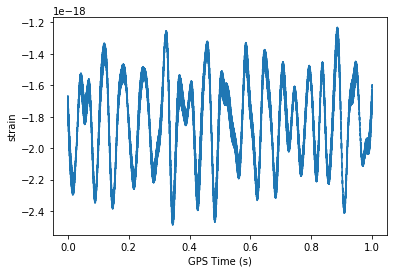

In [98]:
num_samples = 10000
# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

## Relational DataBases

<div class="alert alert-block alert-danger">
<b>Data Structure:</b> 
<ul>
    <li>Every table contains a primary key column, which has a unique entry for each row.
</li>
    <li>Each row or record in a table represents an instance of an entity type.
</li>
    <li>Each column in a table represents an attribute or feature of an instance.
</li>
</ul>
</div>

<b> Relational DataBase Management Systems </b>
- PostgreSQl
- MySQL
- SQLite

All of these uses the SQL Query Language <br>
SQl = Structured Query Language

### Creating Connection

Package used to access SQLite Database = SQLAlchemy

``` python
from sqlalchemy import create_engine
# Create engine
engine = create_engine('sqlite:///xyz.sqlite')     #type of database:///name of database
#Get Table Names
engine.table_names() 
```

In [101]:
from sqlalchemy import create_engine

# Create engine
engine = create_engine('sqlite:///datasets/Chinook.sqlite')   #type of database:///name of database

In [102]:
engine.table_names()    #Get Table Names

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

In [103]:
# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
print(table_names)


['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


### Quering

<b> WORKFLOW </b>:
- Create Engine
- Create Connection
- Query DataBase
- Save Query result to DataFrame
- Close the connection

#### Basic Quering

<div class="alert alert-block alert-danger">
<b>Example: Quering</b>  <br>
<ul>
    <li>SELECT * FROM Table_Name      <br>
        #returns all columns of all rows  <br> <br> <br>
    <li>SELECT column_1, column_2 FROM Table_Name  </li>
    <br>
      #particular columns
</ul>
</div>

<center><b style="font-size:40px;color:black"> Without Context Manager  </b></center>

In [104]:
from sqlalchemy import create_engine
import pandas as pd

# Create engine
engine = create_engine('sqlite:///datasets/Chinook.sqlite')
# Open engine connection
con = engine.connect()
# Perform query: rs
rs = con.execute("SELECT * FROM Album")

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())


   0                                      1  2
0  1  For Those About To Rock We Salute You  1
1  2                      Balls to the Wall  2
2  3                      Restless and Wild  2
3  4                      Let There Be Rock  1
4  5                               Big Ones  3


<center><b style="font-size:40px;color:black"> With Context Manager  </b></center>

In [105]:
engine = create_engine('sqlite:///datasets/Chinook.sqlite')
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM Employee")
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

print(df.head())

  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent


#### Filtering

<div class="alert alert-block alert-danger">
<b>Example: Quering</b>  <br>
<ul>
    <li>SELECT * FROM Table_Name WHERE column_name >= 6   </li> <br>
    #Setting condition on a column <br>

</ul>
</div>

In [108]:
# Create engine: engine
engine = create_engine('sqlite:///datasets/Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee WHERE EmployeeId >= 6")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()          #Set dataFrame column naes as the sql keys

# Print the head of the DataFrame df
df.head(3)

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,6,Mitchell,Michael,IT Manager,1,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
1,7,King,Robert,IT Staff,6,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
2,8,Callahan,Laura,IT Staff,6,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


#### Ordering with ORDER BY

<div class="alert alert-block alert-danger">
<b>Example: Quering</b>  <br>
<ul>
    <li>SELECT * FROM Tqable_Name ORDER BY column_name   </li> <br>
    #Oder data using the column  <br>

</ul>
</div>

In [111]:
# Create engine: engine
engine = create_engine('sqlite:///datasets/Chinook.sqlite')

# Open engine in context manager
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee ORDER BY BirthDate")
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

df.head(3)


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com


### Quering using Pandas

``` python
pd.read_sql_query("SELECT * FROM Album", engine)
                    #query                #engine

```

In [112]:
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///datasets/Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Album", engine)

# Print head of DataFrame
df.head(2)


,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2


<center><b style="font-size:40px;color:black"> Complex Quering </b></center>

In [114]:
engine = create_engine('sqlite:///datasets/Chinook.sqlite')

df = pd.read_sql_query(
    "SELECT * FROM Employee WHERE EmployeeId >= 6 ORDER BY BirthDate",
    engine
)


df.head(2)


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,8,Callahan,Laura,IT Staff,6,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
1,7,King,Robert,IT Staff,6,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com


### Joining Tables

 - INNER JOIN

<center><b style="font-size:40px;color:black"> Table-1  </b></center>

In [123]:
engine = create_engine('sqlite:///datasets/Chinook.sqlite')
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album ")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

df.head(3)


,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2


<center><b style="font-size:40px;color:black"> Table-2  </b></center>

In [124]:
engine = create_engine('sqlite:///datasets/Chinook.sqlite')
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Artist ")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

df.head(3)

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith


<center><b style="font-size:40px;color:black"> Inner Join Table-1 & Table-2 </b></center>

SELECT * FROM table_1 INNER JOIN table_2 on table_1.col_1 = table_2.col_2

In [128]:
engine = create_engine('sqlite:///datasets/Chinook.sqlite')
with engine.connect() as con:
    rs = con.execute("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

df.head(3)


,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept


<center><b style="font-size:40px;color:black"> Advanced Quering + Inner Join </b></center>

In [130]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query(
    "SELECT * FROM PlaylistTrack INNER JOIN Track ON PlaylistTrack.TrackId = Track.TrackId WHERE Milliseconds < 250000",
    engine
)

df.head(3)

,PlaylistId,TrackId,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,3390,3390,One and the Same,271,2,23,None,217732,3559040,0.99
1,1,3392,3392,Until We Fall,271,2,23,None,230758,3766605,0.99
2,1,3393,3393,Original Fire,271,2,23,None,218916,3577821,0.99


## Importing From Internet

### Flat Files Auto Download from Link

#### CSV

<center><b style="font-size:40px;color:black"> CSV  </b></center>

- Automating File Download:

``` python
from urllib.request import urlretrieve
url = 'https://................csv'  #url of csv file
urlretrieve(url, 'xyz.csv')        # Save file locally
df = pd.read_csv('xyz.csv')         #Read csv using pandas
```

In [134]:
from urllib.request import urlretrieve
import pandas as pd

url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
# Save file locally
urlretrieve(url, 'winequality-red.csv')
# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Excel

<center><b style="font-size:40px;color:black"> EXCEL  </b></center>

In [133]:
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'
xls = pd.read_excel(url, sheet_name=None)        #shooe_name = None = Import all sheets
# Print the sheetnames 
print(xls.keys())
# Print the head of the first sheet (using its name, NOT its index)
print(xls['1700'].head())

dict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


### HTTP Request (Obtaining HTML from webpages)

#### Theory

URL = Uniform/Universal Resource Locator <br>
Can Refer to Web-Addresses, FTP (File Tranfer Protocols), DataBase Access
<br><br>
<b> Web-Address URL's :</b>
<br>
Ingredients <br>
- Protocol Identifier (http)
- Resource Name (eg: Datacamp.com)
<br><br>
<b> HTTP </b> : Hyper-Text Transfer Protocol <br>
<b> HTTPS </b> : More Secure Form of HTTP
<br><br><br>
Accessing a website = Sending a HTTP Request( GET Reuest)

#### URLLIB LIbrary (Low-Level Library)

``` python
from urllib.request import urlopen, Request
url = "http://www.datacamp.com/teach/documentation"
request = Request(url)       #Request
response = urlopen(request)  #Get Response
html = response.read()   # Extract the response: html
response.close()


```

In [145]:
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"
request = Request(url)    #Request
response = urlopen(request) #Get Response
html = response.read()      # Extract the response: html
response.close()

print(type(response))

<class 'http.client.HTTPResponse'>


#### REQUESTS Library (Higher Level)

``` python
import requests
url = "http://www.datacamp.com/teach/documentation"
r = requests.get(url)   #Get response
text = r.text           # Extract the response
```

In [148]:
import requests

url = "http://www.datacamp.com/teach/documentation"
r = requests.get(url)
text = r.text

#Printing  the HTML
#print(text) 

### Web Scrapping

<b> Parsing HTML with BeautifulSoup Package: </b> 

``` python
import requests
from bs4 import BeautifulSoup
url = 'https://www.python.org/~guido/'
r = requests.get(url)                 #Get Response
html_doc = r.text                     #Get Raw Html
  

soup = BeautifulSoup(html_doc)        #Create a BeautifulSoup object
pretty_soup = soup.prettify()         # Prettify the BeautifulSoup object
```

In [149]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.python.org/~guido/'
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="images/df20000406.jpg">
    Who I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a href="Publications.html">
    publicati

<b> Getting the TITLE: </b> 

In [151]:
# Get the title of Guido's webpage: guido_title
guido_title = soup.title

print(guido_title)

<title>Guido's Personal Home Page</title>


<b> Getting the TEXT: </b> 

In [153]:
# Get Guido's text: guido_text
guido_text = soup.get_text()

print(guido_text)



Guido's Personal Home Page




Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am retired, working on personal projects (and maybe a book).
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but I receive too much email to respond
to everything.

My Name
My name often poses difficulties for Americans.

Pronunciation: in Dutch, the "G" in Guido is a hard G,
pronounced roughly like the "ch" in Scottish "loch".  (Listen to the
sound clip.)

<b> Getting the a-tags (hyperlinks): </b> 

In [154]:
# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
images/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


### API's

API = Application Programming Interface <br>
API = Set of protocols/routines for building & interacting with software applications <br><br>

JSOPN - JavaScript Object Notation
- Real Time Server tro Browser Communication

#### Loading/Exploring JSON Files

In [159]:
import json

In [161]:
# Load JSON: json_data
with open("datasets/sample-json.json") as json_file:
    json_data = json.load(json_file)

In [162]:
type(json_data)

dict

In [163]:
# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])    #printing key-value pairs

firstName:  Rajesh
lastName:  Kumar
gender:  man
age:  24
address:  {'streetAddress': '126 Udhna', 'city': 'Surat', 'state': 'GJ', 'postalCode': '394221'}
phoneNumbers:  [{'type': 'home', 'number': '7383627627'}]


#### API

##### Query String

<b> CONNECTING TO AN API </b>

<b> Query String: (?.....) </b><br><br>
    eg: ?t=hackers    <br> #t = title<br> 
        >> returns data about movie with title = hackers 


<hr style="border-width: 5px;border-color:#000000;border-radius: 200px">


url = ' api_website / ?API_KEY & Query_String'

eg:

url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'

Return API request for Movie tith title = The Social Network


##### Movie DataBase API

In [170]:
import requests

url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'
r = requests.get(url)
print(r.text)    #Getting Raw Text from API request

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 171 wins & 183 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"603,038","imdbID":"tt1285

<b> GETTING JSON DATA ::</b>

In [167]:
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'
r = requests.get(url)
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 171 wins & 183 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  603,038
imdbID:  tt1285016
Type:  movie
DVD:  11

##### Wikipedia API

<b> Gettinbg Intro Text of Wikipedia Page of Pizza </b>

In [190]:
import requests
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'
r = requests.get(url)
json_data = r.json()

In [195]:
for k in json_data.keys():
    print(k + ': ', json_data[k])

batchcomplete:  
warnings:  {'extracts': {'*': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Special:MyLanguage/Extension:TextExtracts#Caveats.'}}
query:  {'normalized': [{'from': 'pizza', 'to': 'Pizza'}], 'pages': {'24768': {'pageid': 24768, 'ns': 0, 'title': 'Pizza', 'extract': '<p class="mw-empty-elt">\n</p>\n\n<p><b>Pizza</b> (<small>Italian:\xa0</small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan:\xa0</small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as anchovies, mushrooms, onions, olives, pineapple, meat, etc.) which is then baked at a high temperature, traditionally in a wood-fired o

- Nested JSON Format

In [192]:
# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as anchovies, mushrooms, onions, olives, pineapple, meat, etc.) which is then baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta.
</p><p>In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced, and is eaten with the use of a knife and fork. In casual settings, however, it is cut into wedges to be eaten while held in the hand.
</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Itali

<b> GETTING THUMBNAIL IMAGES </b>

In [235]:
import requests
url = 'http://en.wikipedia.org/w/api.php?action=query&titles=pizza&prop=pageimages&format=json&pithumbsize=600'
r = requests.get(url)
json_data = r.json()

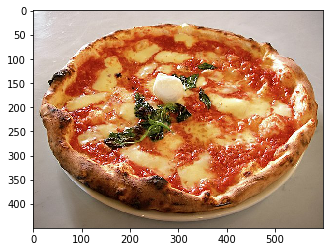

In [236]:
import skimage
from skimage import io

image_filename = json_data['query']['pages']['24768']['thumbnail']['source']
image_numpy = skimage.io.imread( image_filename )
plt.imshow(image_numpy)

##### Twitter API

https://developer.twitter.com/
- Create App

API's of Twitter
 - REST API (Representational State Transfer) - #Read and Write Twitter Data
- STREAMING API (Real time processing) #Public Stream, User Streaam, User Streams

- Public Streams:
    - GET statuses/sample API
    - Returns a small random sample of all public statuses
 
- Firehouse API  (Paid)
    - Access all public statuses

Tweepy Package

In [280]:
import tweepy
consumer_key = "vJJb8KjDTGovRYJN7qGuAD4L4" #api_key
consumer_secret = "pZgIla9HNajbWwGs0Z06OYrerrKNEjCKASO0bQbLOFBBOqsSiy" #api_secret_key
access_token = "550820312-JJR97g51vcKLueSZz7ixM23JlYrXqkINlXLERqqB"
access_token_secret = "UFVIhT7sZAWZNGnxozWq18TKibC5fSUgXJJyhO7w1R5Lp"

In [281]:
import tweepy
# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [282]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:             #save 100 tweets in 1 go
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)       #save tweets into text file

In [283]:
# Initialize Stream listener
l = MyStreamListener()
# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)
# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])

In [284]:
import json

tweets_data_path = 'tweets.txt'
tweets_data = []     # Initialize empty list to store tweets: tweets_data
tweets_file = open(tweets_data_path, "r")   # Open connection to file

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])


In [285]:
import pandas as pd

df = pd.DataFrame(tweets_data, columns=['text', 'lang'])   # Build DataFrame of tweet texts and languages

df.head()

,text,lang
0,RT @karentravers: Herman Cain was admitted to ...,en
1,"RT @WalshFreedom: Coronavirus, America 2020: W...",en
2,RT @jsolomonReports: Vindicated? Trump-touted ...,en
3,@DanaStarr18 You sure you wanna vote for the d...,en
4,RT @gr8tjude_08: Father of teen shot and kille...,en


-  count how many tweets contain the words:

In [286]:
import re
#tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [287]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

[Text(0, 0.5, 'count')]

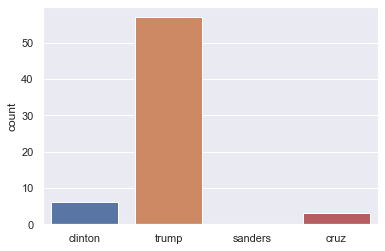

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Create a list of labels
cd = ['clinton', 'trump', 'sanders', 'cruz']


ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")